In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# 生成 2 分类数据
X, y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# 转成 DataFrame，像真实数据那样
df = pd.DataFrame(X, columns=['feature1', 'feature2'])
df['target'] = y

df.head()


,feature1,feature2,target
0,1.008455,-1.047010,0
1,0.326021,0.502541,1
2,1.024205,-1.797143,0
3,0.121880,1.059371,0
4,0.039100,0.382369,1


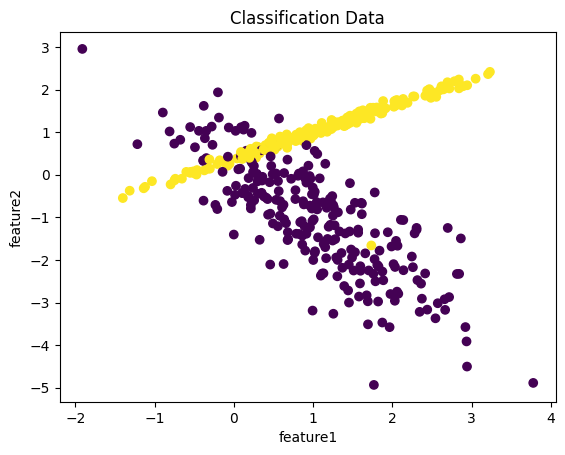

In [3]:
plt.scatter(df['feature1'], df['feature2'], c=df['target'])
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Classification Data')
plt.show()


In [4]:
from torch.utils.data import TensorDataset, DataLoader

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)


In [5]:
class SimpleNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 2)
        )
    
    def forward(self, x):
        return self.net(x)

model = SimpleNet()


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [7]:
losses = []

for epoch in range(20):
    total_loss = 0
    for xb, yb in loader:
        preds = model(xb)
        loss = criterion(preds, yb)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    avg_loss = total_loss / len(loader)
    losses.append(avg_loss)
    print(f"Epoch {epoch+1} - Loss: {avg_loss:.4f}")


Epoch 1 - Loss: 0.5579
Epoch 2 - Loss: 0.3257
Epoch 3 - Loss: 0.2484
Epoch 4 - Loss: 0.2061
Epoch 5 - Loss: 0.1858
Epoch 6 - Loss: 0.1642
Epoch 7 - Loss: 0.1562
Epoch 8 - Loss: 0.1448
Epoch 9 - Loss: 0.1407
Epoch 10 - Loss: 0.1341
Epoch 11 - Loss: 0.1327
Epoch 12 - Loss: 0.1300
Epoch 13 - Loss: 0.1259
Epoch 14 - Loss: 0.1241
Epoch 15 - Loss: 0.1217
Epoch 16 - Loss: 0.1205
Epoch 17 - Loss: 0.1188
Epoch 18 - Loss: 0.1179
Epoch 19 - Loss: 0.1177
Epoch 20 - Loss: 0.1148


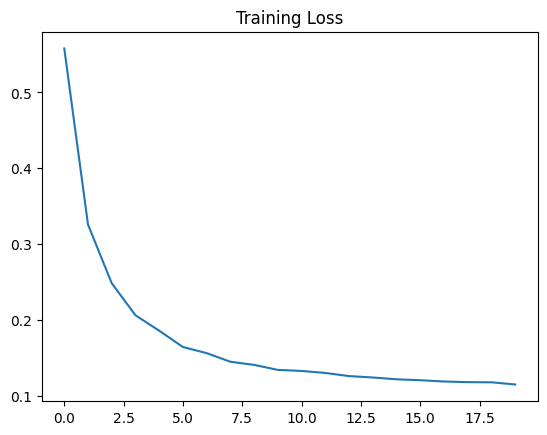

In [8]:
plt.plot(losses)
plt.title('Training Loss')
plt.show()
